# MODEL DEVELOPMENT FOR DISSERTATION

##### Import relevant Libraries

In [1]:
# Importing the library to work with for this prject
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


In [2]:
# Load the Kaggle heart dataset from a CSV file into a DataFrame.
kaggleData = pd.read_csv("Kaggle_heart_data2.csv", sep=',', low_memory=False)

# Create a copy of the original dataset to work with.
cardio_df = kaggleData.copy()

# Display the first 3 rows of the copied dataset to get an overview.
cardio_df.head(3)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
# Calculate the total number of null values for each column in the DataFrame.
total_null_count = cardio_df.isnull().sum()

# Display the total number of null values for the entire DataFrame.
print("Total number of null values:", total_null_count)


Total number of null values: id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [4]:
# Group the DataFrame by the 'gender' column and calculate the mean of all numerical columns for each gender category, Display the mean statistics for each gender category.
cardio_df.groupby("gender").mean()



,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


From the mean of gender analysis, the age averages are equal. Since the average height and weight for gender 1 is generally smaller than gender 2, we can say that Gender 1 is female and gender 2 is male

Then the Age column is in days so we have to derive the age in years to make it easier to work with

In [5]:
# Display concise summary information about the DataFrame, including column data types and non-null counts.
cardio_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
def col_list(dataframe, cat_th=10, car_th=20):
    """
    Analyze the columns of a given DataFrame based on the provided thresholds for categorical and cardinal columns.
    
    Parameters:
    - dataframe (DataFrame): The input DataFrame to analyze.
    - cat_th (int, optional): Threshold for considering columns as categorical. Default is 10.
    - car_th (int, optional): Threshold for considering categorical columns as cardinal. Default is 20.
    
    Returns:
    - cat_cols (list): List of categorical columns.
    - num_cols (list): List of numerical columns.
    - cat_but_car (list): List of categorical columns that exceed the cardinality threshold.
    """
    
    # Identify columns with 'object' data type as categorical.
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identify numerical columns that have a unique value count less than the categorical threshold.
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identify categorical columns that have a unique value count greater than the cardinal threshold.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Combine categorical columns and numerical columns that are not mistakenly identified as categorical.
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    # Identify pure numerical columns.
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display summary statistics based on identified columns.
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical columns: {len(cat_cols)}')
    print(f'Numerical columns: {len(num_cols)}')
    print(f'Categorical but cardinal columns: {len(cat_but_car)}')
    print(f'Numerical but categorical columns: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

# Execute the function on the cardio_df DataFrame and retrieve the results.
cat_cols, num_cols, cat_but_car = col_list(cardio_df)

# Display the identified columns.
print("\nNumerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)
print("\nCardinal Columns:", cat_but_car)


Observations: 70000
Variables: 13
Categorical columns: 7
Numerical columns: 6
Categorical but cardinal columns: 0
Numerical but categorical columns: 7

Numerical Columns: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']

Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Cardinal Columns: []


,gender,Ratio
1,45530,65.042857
2,24470,34.957143


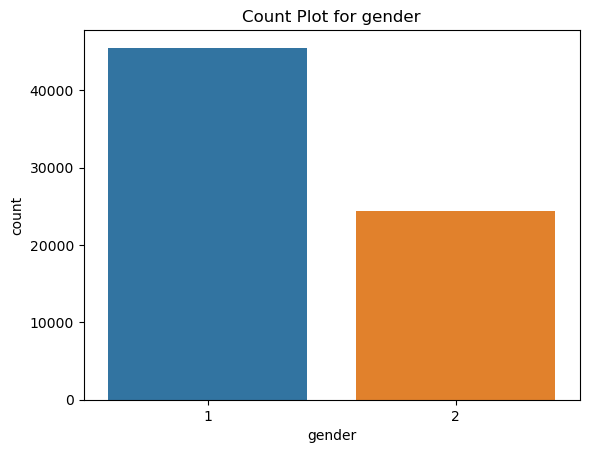

,cholesterol,Ratio
1,52385,74.835714
2,9549,13.641429
3,8066,11.522857


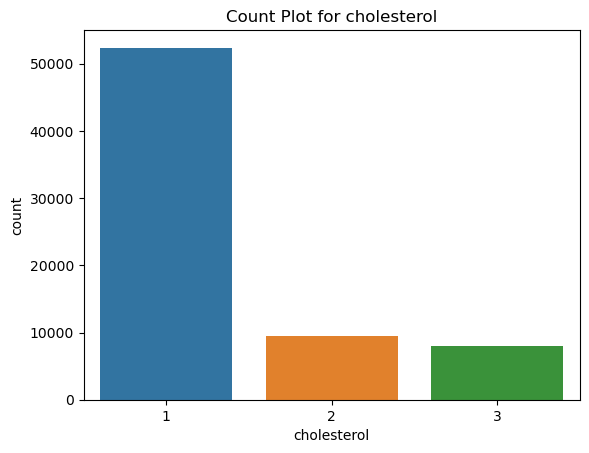

,gluc,Ratio
1,59479,84.970000
3,5331,7.615714
2,5190,7.414286


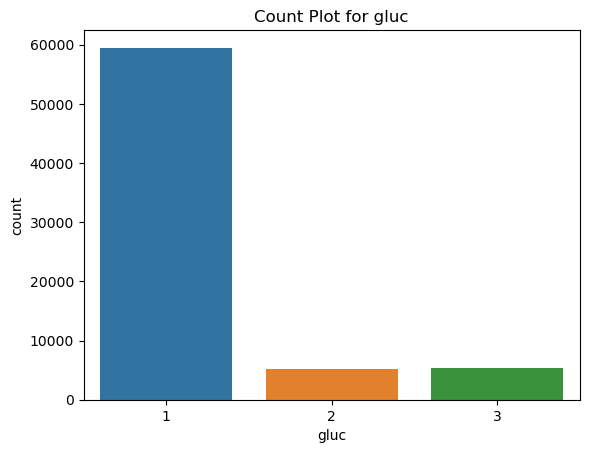

,smoke,Ratio
0,63831,91.187143
1,6169,8.812857


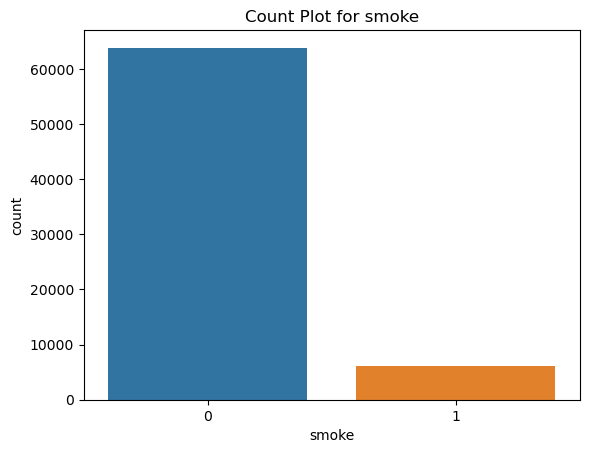

,alco,Ratio
0,66236,94.622857
1,3764,5.377143


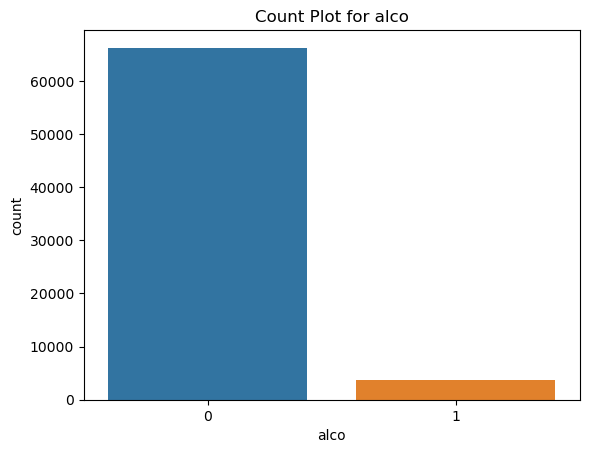

,active,Ratio
1,56261,80.372857
0,13739,19.627143


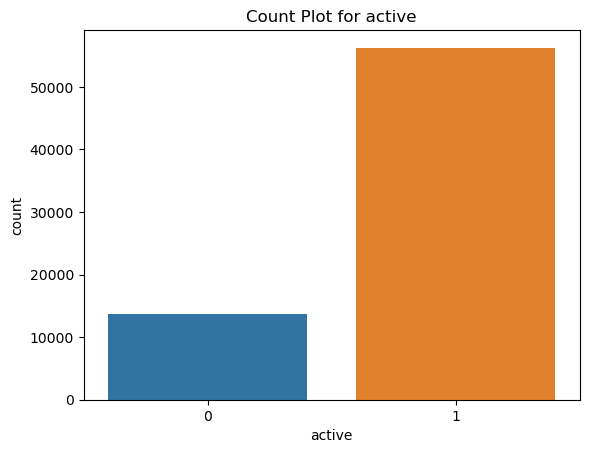

,cardio,Ratio
0,35021,50.03
1,34979,49.97


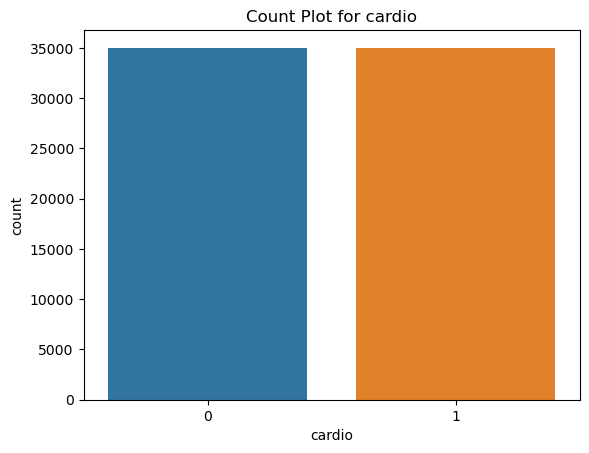

In [7]:
def cat_summary(dataframe, col_name, plot=False):
    """
    Generate a summary for a categorical column in a DataFrame, including value counts and ratios.
    
    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the column of interest.
    - col_name (str): The name of the categorical column to summarize.
    - plot (bool, optional): Flag to determine whether to display a count plot. Default is False.
    """
    
    # Calculate the count and ratio for each unique value in the column.
    value_counts = dataframe[col_name].value_counts()
    ratio = 100 * value_counts / len(dataframe)

    # Create a summary DataFrame with counts and ratios.
    summary_df = pd.DataFrame({col_name: value_counts, "Ratio": ratio})
    
    # Display the summary DataFrame.
    display(summary_df)

    # If the plot flag is True, generate a count plot for the column.
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title(f"Count Plot for {col_name}")
        plt.show()

# Iterate through each categorical column and generate its summary.
for col in cat_cols:
    cat_summary(cardio_df, col, plot=True)


We observed that the variables for 'smoking', 'alcohol', and 'activity' have skewed distributions in the dataset. This means that these variables may not reflect the true population characteristics for this study.

Another thing to note is that the glucose and cholesterol variables in the dataset are coded as 1, 2, and 3. Based on what we know about these measures, we can interpret that 1 means normal levels, 2 means slightly abnormal levels, and 3 means significantly abnormal levels.

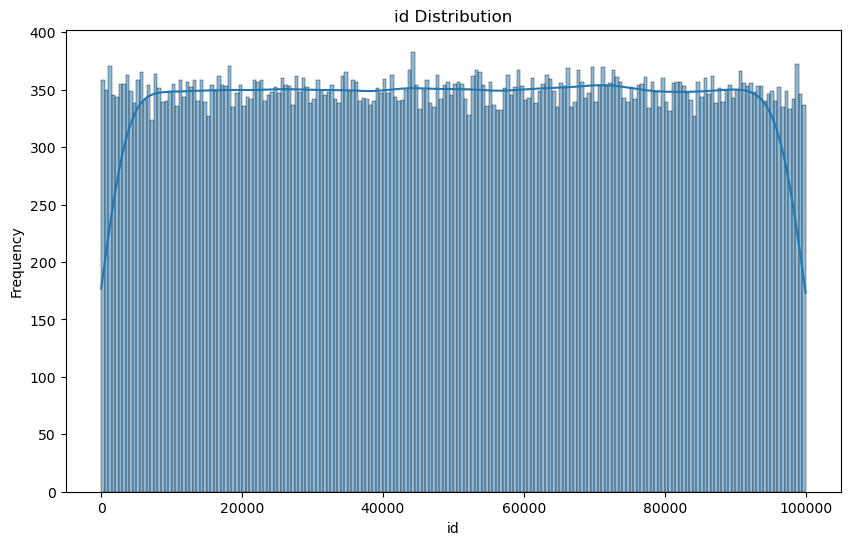

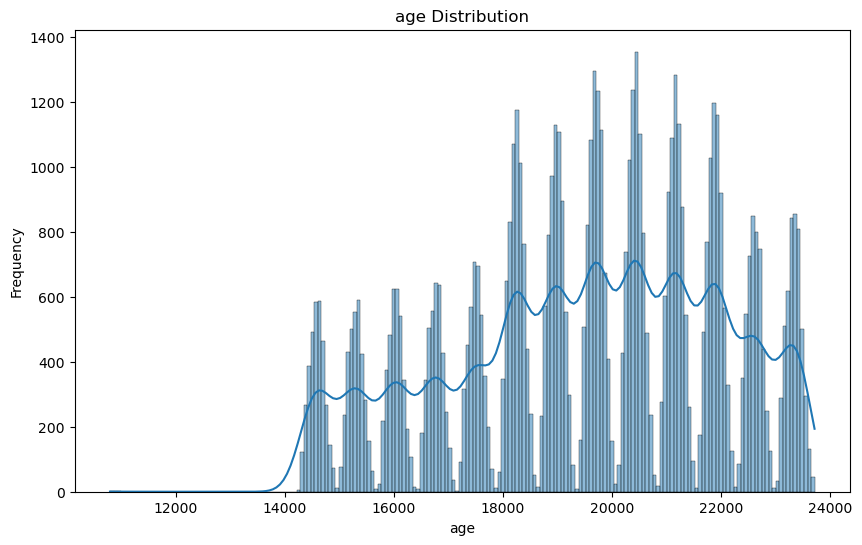

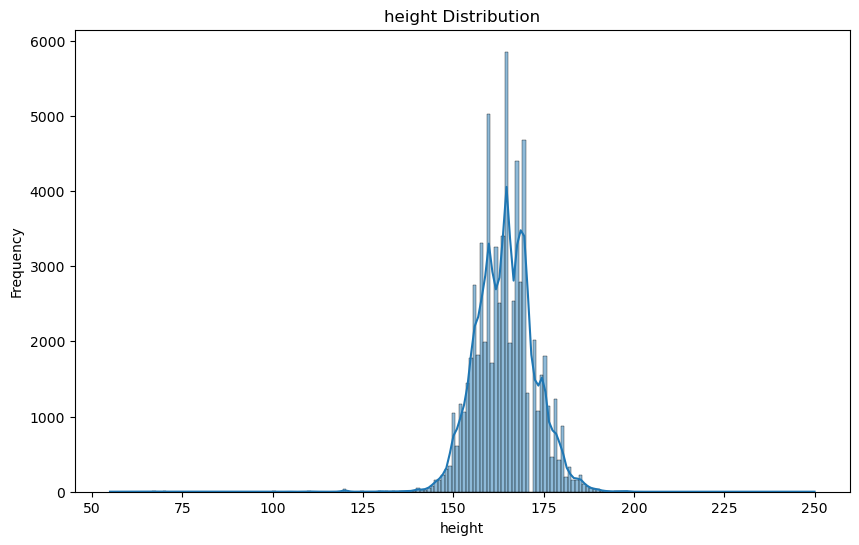

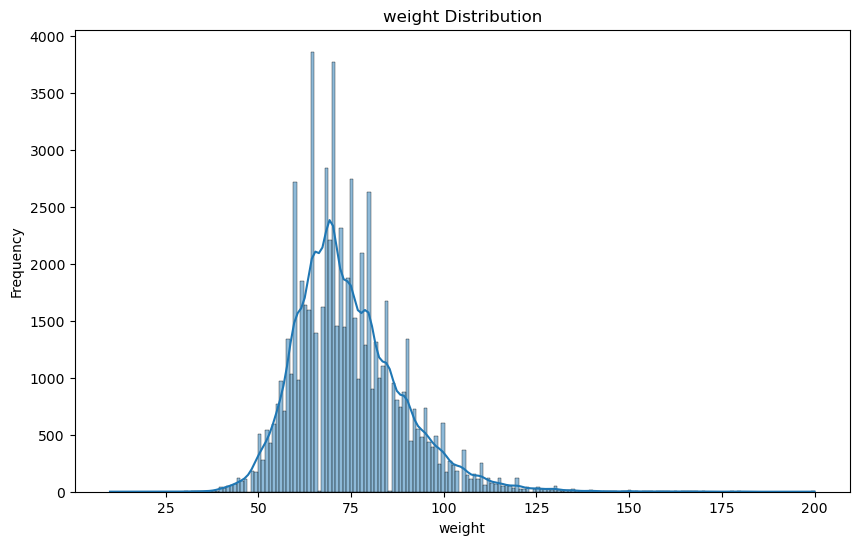

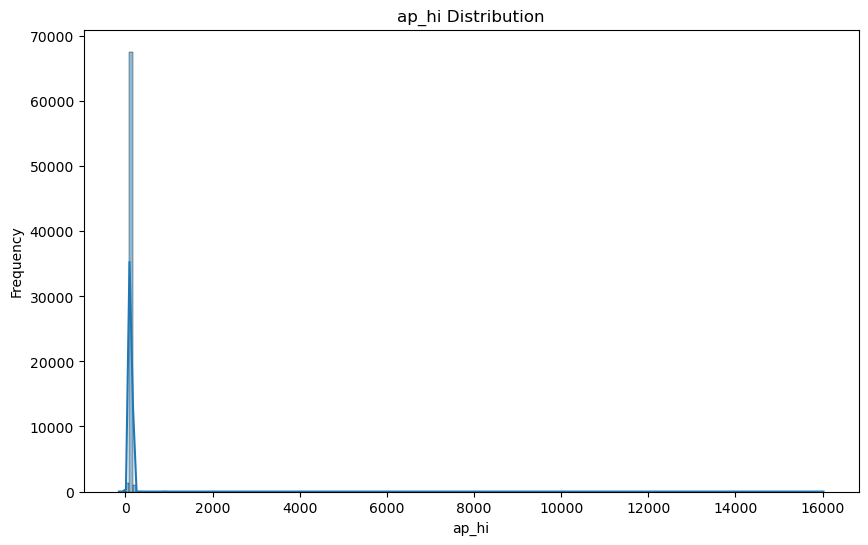

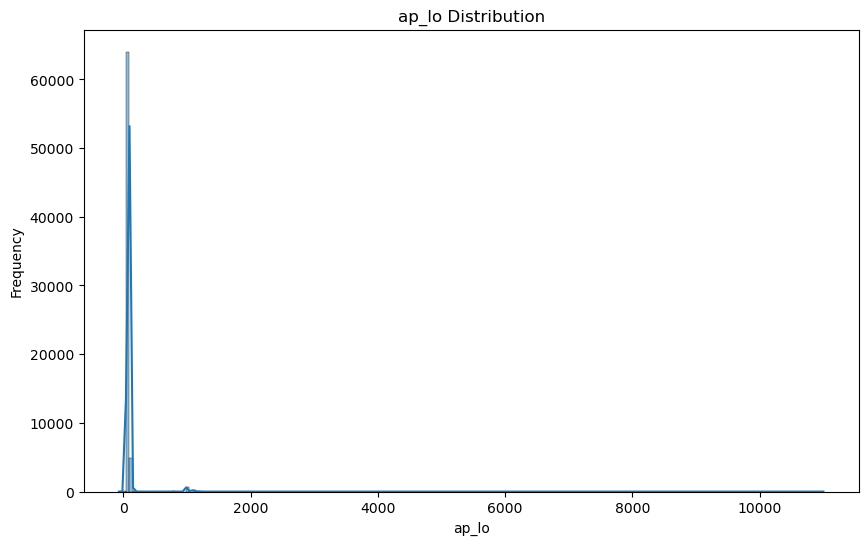

In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    """
    Generate a summary of descriptive statistics for a numerical column in a DataFrame.
    Optionally, visualize the distribution of the column using a histogram.
    
    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the numerical column.
    - numerical_col (str): The name of the numerical column to summarize.
    - plot (bool, optional): Flag to determine whether to display a histogram. Default is False.
    
    Returns:
    - summary_stats (Series): Series containing descriptive statistics for the numerical column.
    """
    
    # Calculate descriptive statistics for the numerical column.
    summary_stats = dataframe[numerical_col].describe()

    # If the plot flag is True, generate a histogram to visualize the distribution.
    if plot:
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[numerical_col], bins=200, kde=True)
        plt.xlabel(numerical_col)
        plt.ylabel("Frequency")
        plt.title(f"{numerical_col} Distribution")
        plt.show()

    # Return the summary statistics for the numerical column.
    return summary_stats

# Iterate through each numerical column and generate its summary.
for col in num_cols:
    num_summary(cardio_df, col, plot=True)


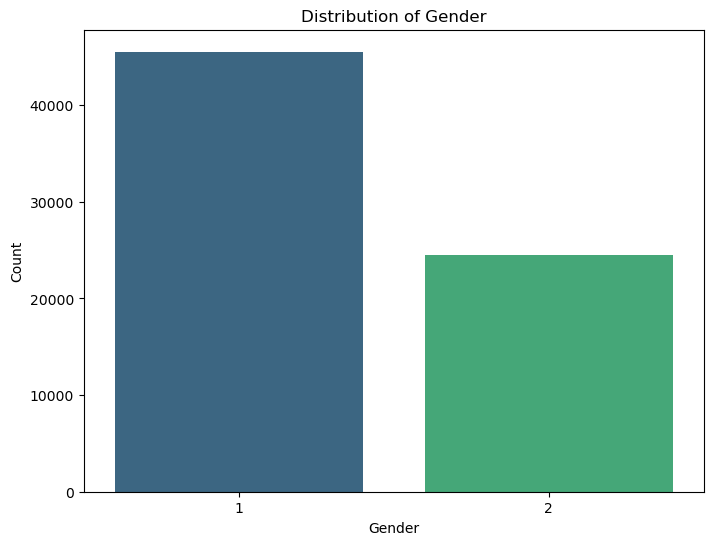

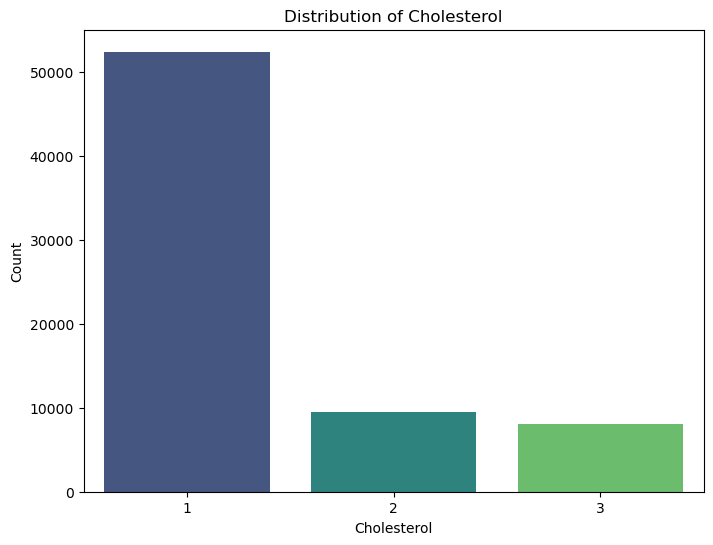

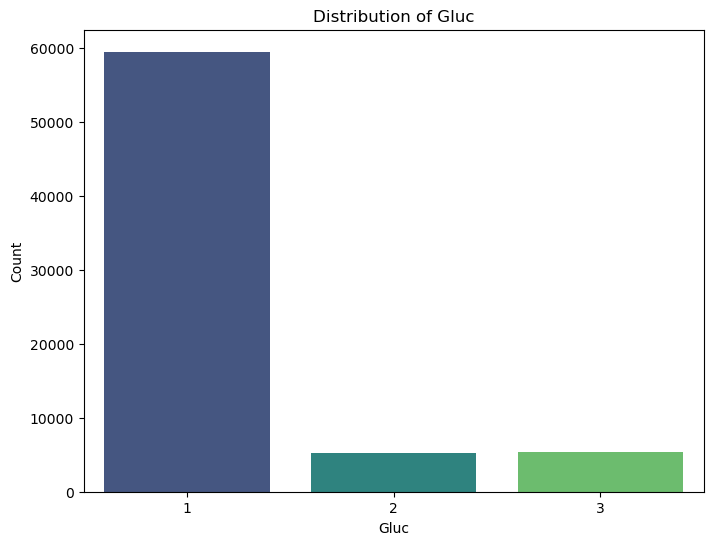

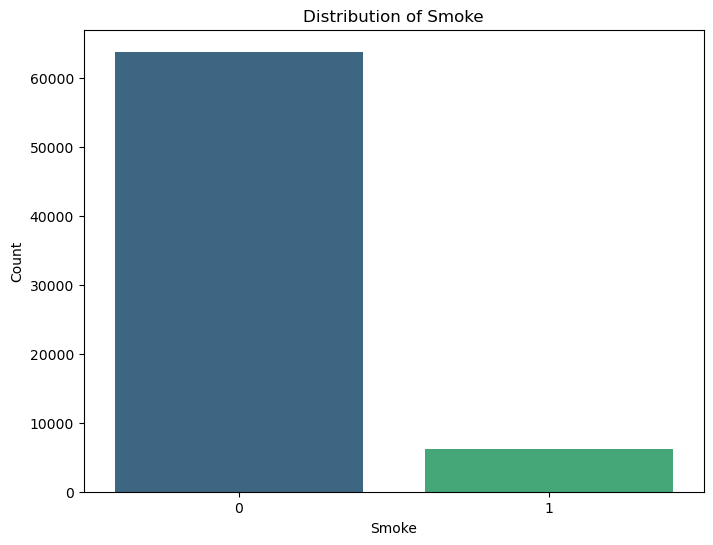

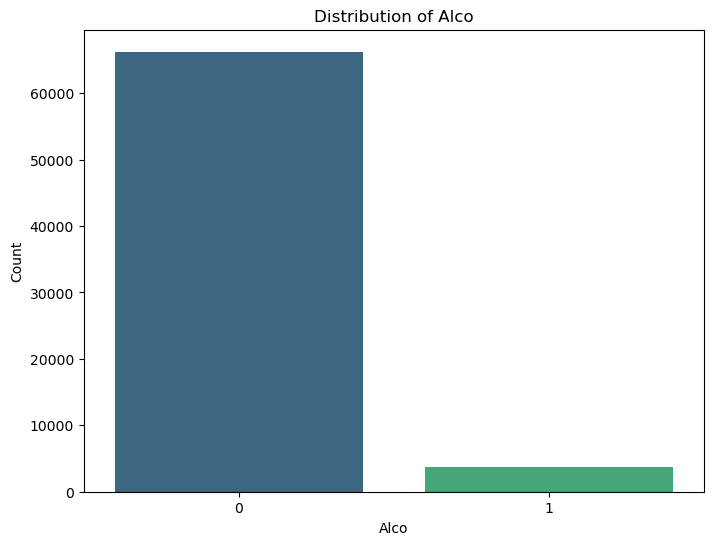

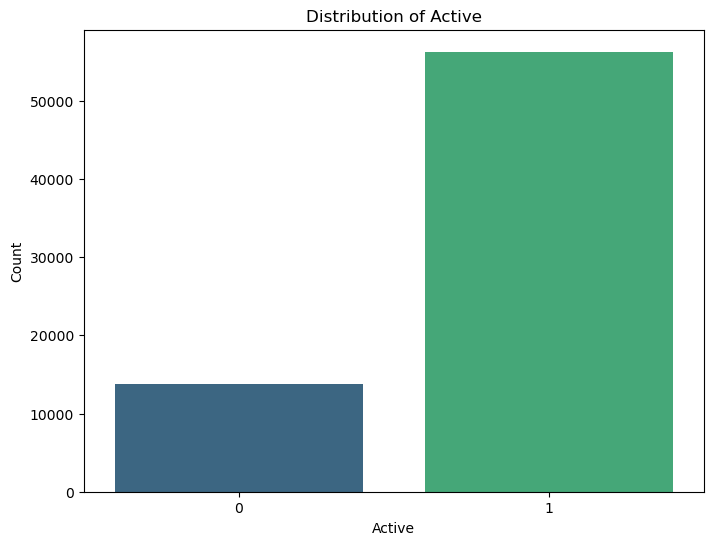

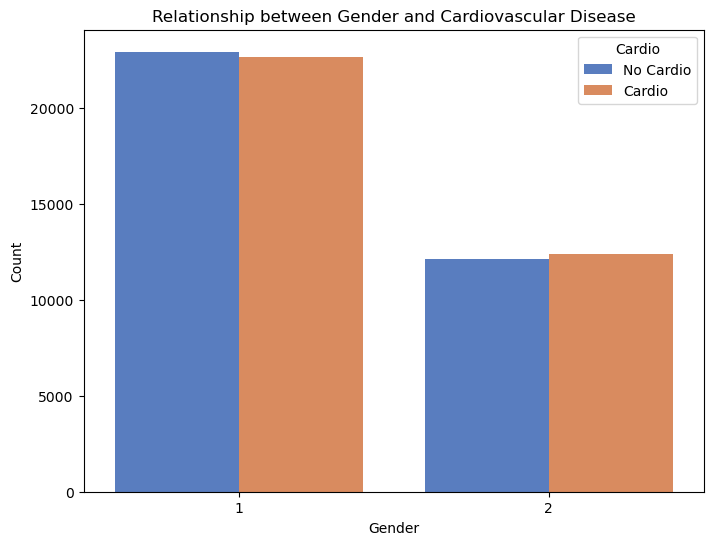

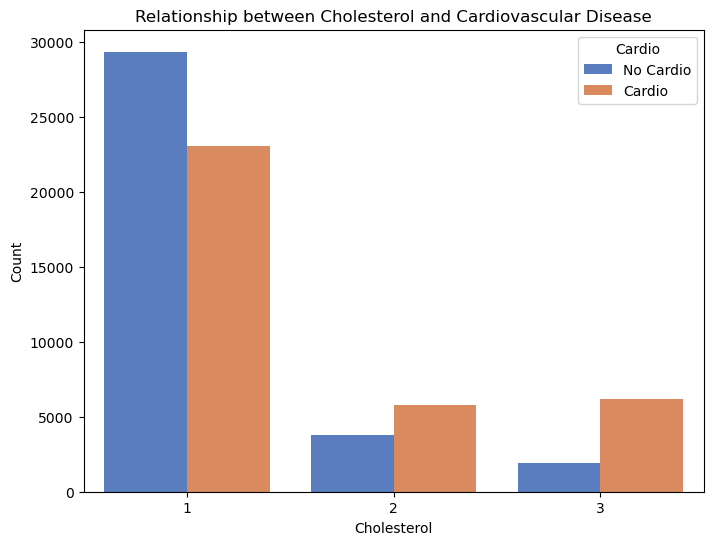

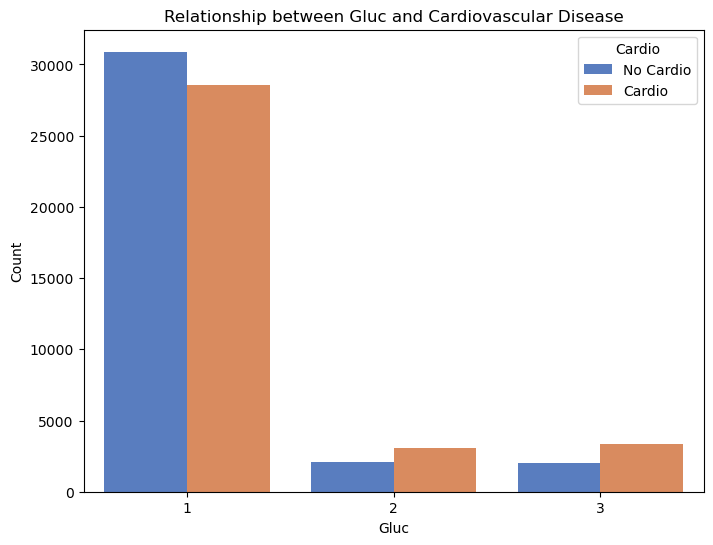

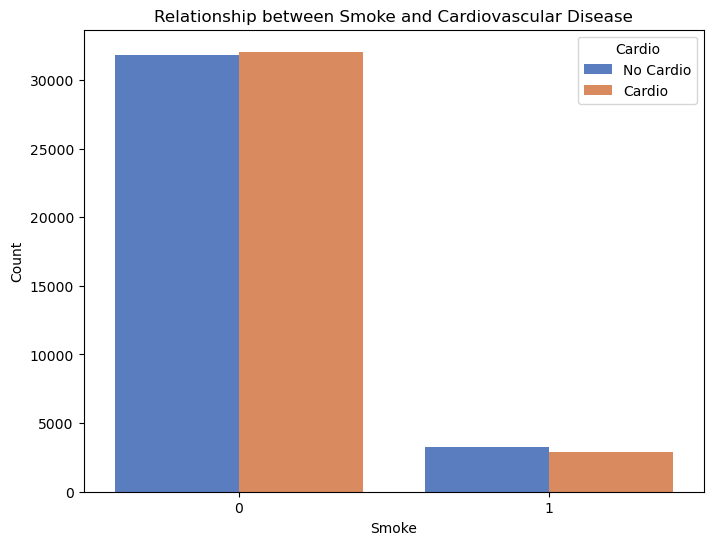

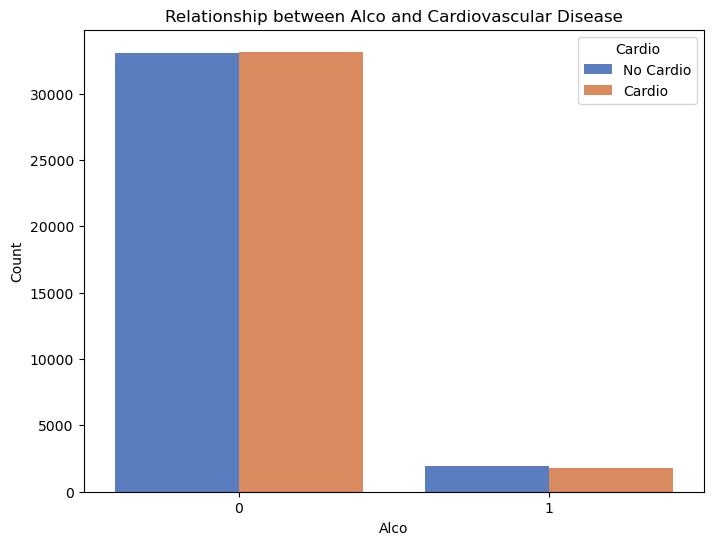

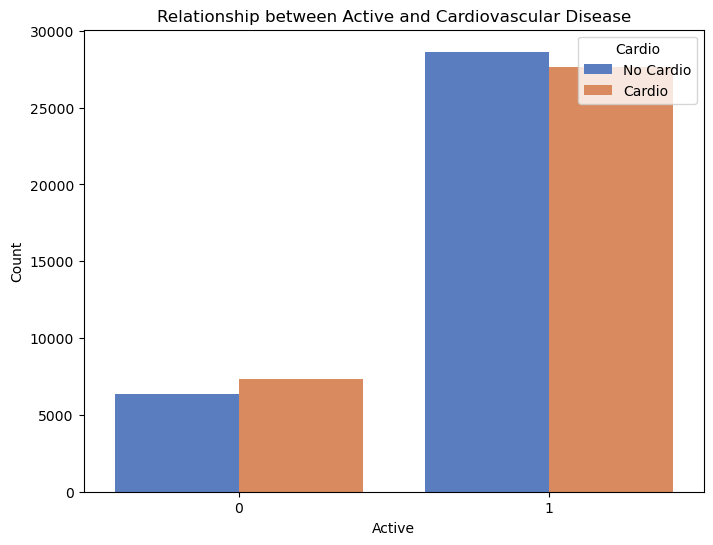

In [9]:
# List of categorical columns to visualize
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Looping through each categorical column for distribution visualization
for column in categorical_columns:
    # Creating a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Creating a count plot for the current categorical column
    sns.countplot(x=column, data=cardio_df, palette='viridis')
    
    # Adding labels and title to the plot
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Distribution of {column.capitalize()}')
    
    # Displaying the plot
    plt.show()

# Exploring the relationship between categorical variables and the target variable (cardio)

# Looping through each categorical column for relationship visualization
for column in categorical_columns:
    # Creating a new figure for each plot
    plt.figure(figsize=(8, 6))
    
    # Creating a count plot with hue for the 'cardio' variable
    sns.countplot(x=column, hue='cardio', data=cardio_df, palette='muted')
    
    # Adding labels, title, and legend to the plot
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'Relationship between {column.capitalize()} and Cardiovascular Disease')
    plt.legend(title='Cardio', loc='upper right', labels=['No Cardio', 'Cardio'])
    
    # Displaying the plot
    plt.show()


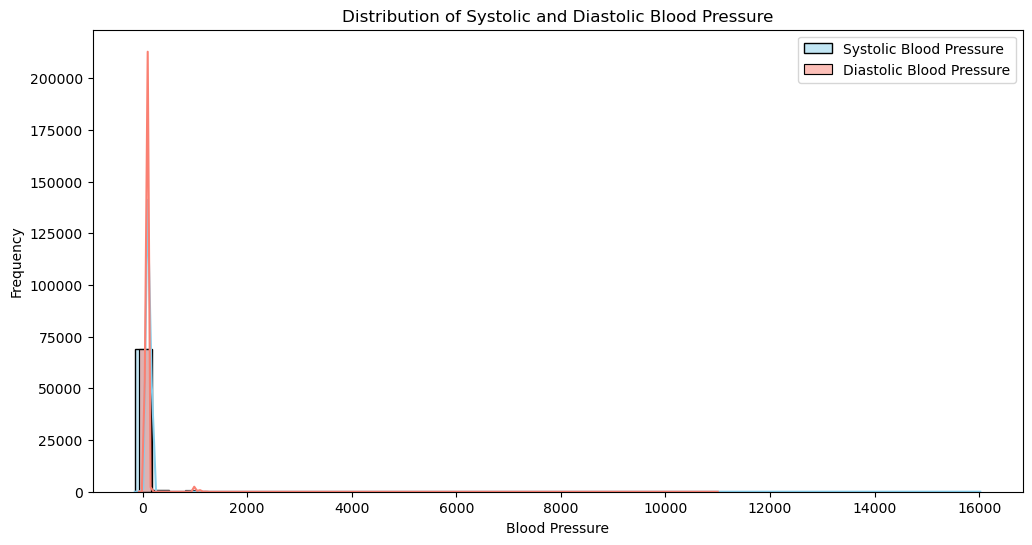

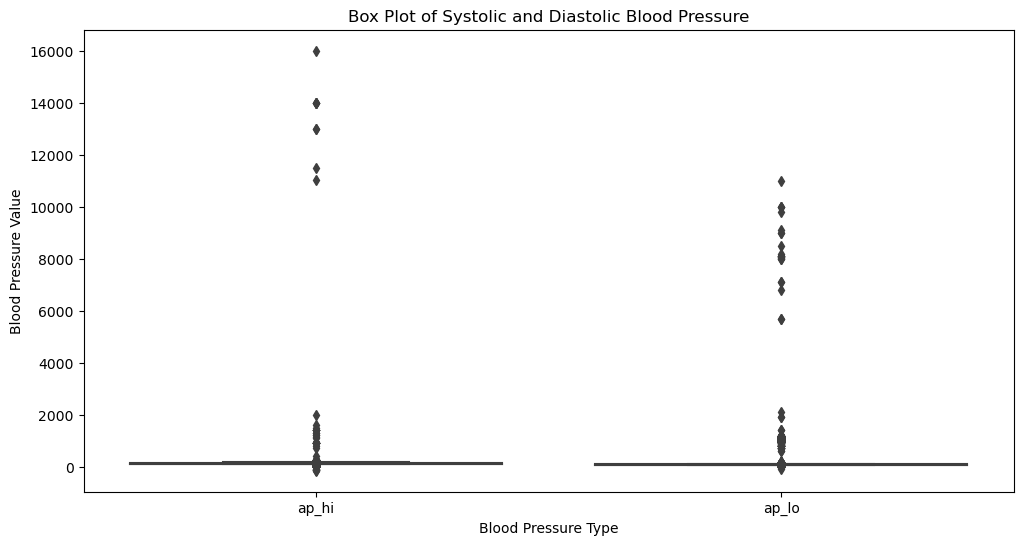

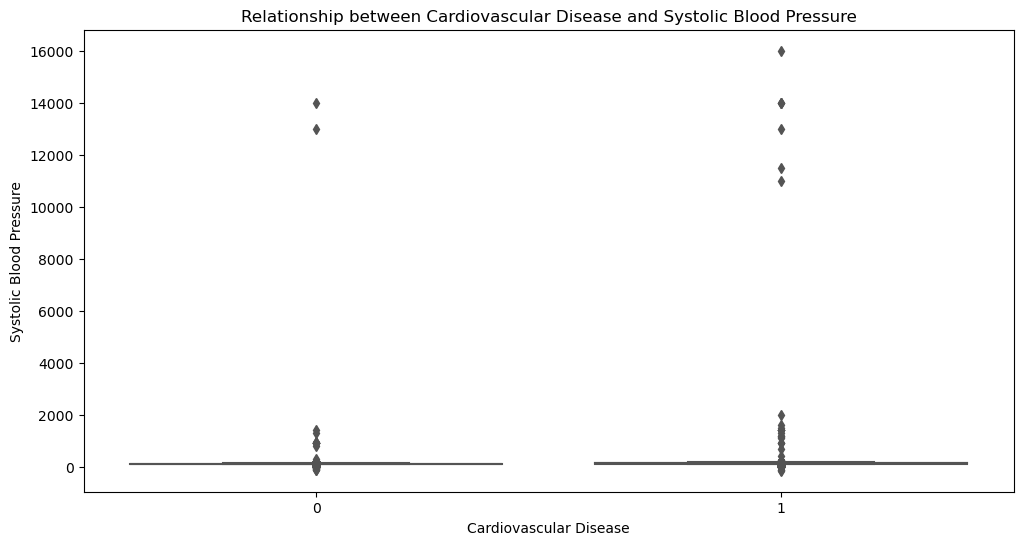

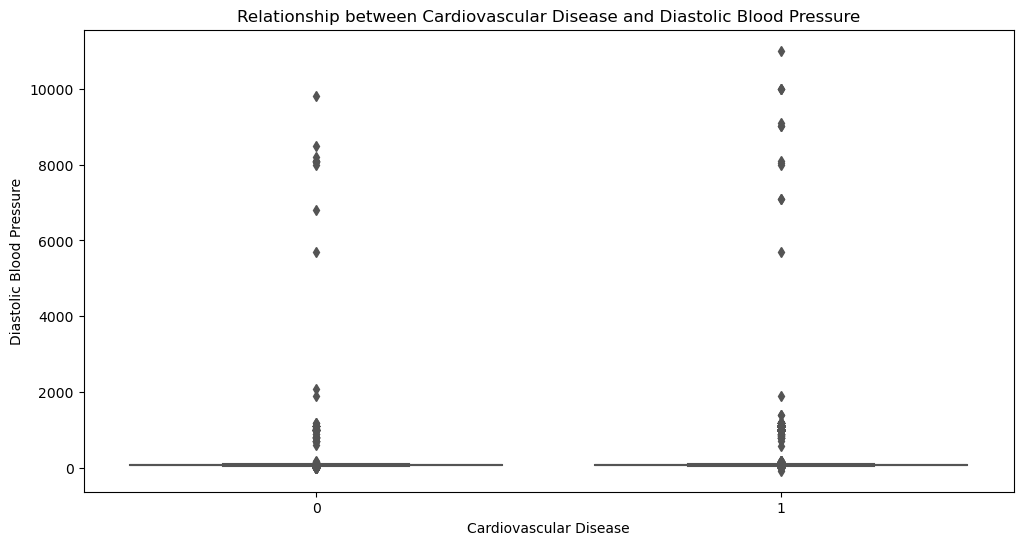

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Analyzing the distribution of systolic and diastolic blood pressure
plt.figure(figsize=(12, 6))
sns.histplot(cardio_df['ap_hi'], bins=50, kde=True, color='skyblue', label='Systolic Blood Pressure')
sns.histplot(cardio_df['ap_lo'], bins=50, kde=True, color='salmon', label='Diastolic Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Systolic and Diastolic Blood Pressure')
plt.legend()
plt.show()

# Identifying potential outliers in blood pressure using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(cardio_df[['ap_hi', 'ap_lo']]))
plt.xlabel('Blood Pressure Type')
plt.ylabel('Blood Pressure Value')
plt.title('Box Plot of Systolic and Diastolic Blood Pressure')
plt.show()

# Investigating the relationship between blood pressure and the target variable

# Relationship between cardiovascular disease and systolic blood pressure
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_hi', data=cardio_df, palette='muted')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Systolic Blood Pressure')
plt.title('Relationship between Cardiovascular Disease and Systolic Blood Pressure')
plt.show()

# Relationship between cardiovascular disease and diastolic blood pressure
plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='ap_lo', data=cardio_df, palette='muted')
plt.xlabel('Cardiovascular Disease')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Relationship between Cardiovascular Disease and Diastolic Blood Pressure')
plt.show()


In [11]:
# setting the target variable as a constant
target_column = "cardio"

In [12]:
# Function to generate a summary of the mean of the target variable grouped by each category in a categorical column.
def target_summary_with_cat(dataframe, target_column, categorical_col):
    """
    Calculate the mean of the target variable for each unique category in a specified categorical column.
    
    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    - target (str): The name of the target variable.
    - categorical_col (str): The name of the categorical column to group by.
    
    Returns:
    - None: The summary is printed to the console.
    """
    # Calculate the mean of the target variable for each unique category in the specified column.
    summary_df = pd.DataFrame({"target_column_Mean": dataframe.groupby(categorical_col)[target_column].mean()})
    
    # Print the summary DataFrame with three newlines for separation.
    print(summary_df, end="\n\n\n")

# Assuming 'cardio_df' is your DataFrame and 'TARGET' is the name of the target variable
for col in cat_cols:
    # Generate a summary for each categorical column in the 'cat_cols' list.
    target_summary_with_cat(cardio_df, target_column, col)


        target_column_Mean
gender                    
1                 0.496727
2                 0.505231


             target_column_Mean
cholesterol                    
1                      0.440107
2                      0.602157
3                      0.765435


      target_column_Mean
gluc                    
1               0.480590
2               0.593064
3               0.622022


       target_column_Mean
smoke                    
0                0.502107
1                0.474793


      target_column_Mean
alco                    
0               0.500574
1               0.484325


        target_column_Mean
active                    
0                 0.535774
1                 0.490891


        target_column_Mean
cardio                    
0                      0.0
1                      1.0




In [13]:
# Function to generate a summary of the mean of a numerical column grouped by the target variable.
def target_summary_with_num(dataframe, target_column, numerical_col):
    """
    Calculate the mean of a specified numerical column for each category in the target variable.
    
    Parameters:
    - dataframe (DataFrame): The input DataFrame containing the data.
    - target (str): The name of the target variable.
    - numerical_col (str): The name of the numerical column for which the mean is to be calculated.
    
    Returns:
    - None: The summary is printed to the console.
    """
    # Calculate the mean of the numerical column for each category in the target variable.
    summary_df = dataframe.groupby(target_column).agg({numerical_col: "mean"})
    
    # Print the summary DataFrame with three newlines for separation.
    print(summary_df, end="\n\n\n")

# Assuming 'cardio_df' is your DataFrame and 'TARGET' is the name of the target variable
for col in num_cols:
    # Generate a summary for each numerical column in the 'num_cols' list.
    target_summary_with_num(cardio_df, target_column, col)


                  id
cardio              
0       49862.869107
1       50082.102233


                 age
cardio              
0       18881.623711
1       20056.813031


            height
cardio            
0       164.448017
1       164.270334


           weight
cardio           
0       71.592150
1       76.822368


             ap_hi
cardio            
0       120.432598
1       137.212042


             ap_lo
cardio            
0        84.251763
1       109.023929




In [14]:
# Drop the 'id' column from the DataFrame 'cardio_df' and modify it in-place
cardio_df.drop(columns=['id'], inplace=True)

# Display the modified DataFrame
cardio_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


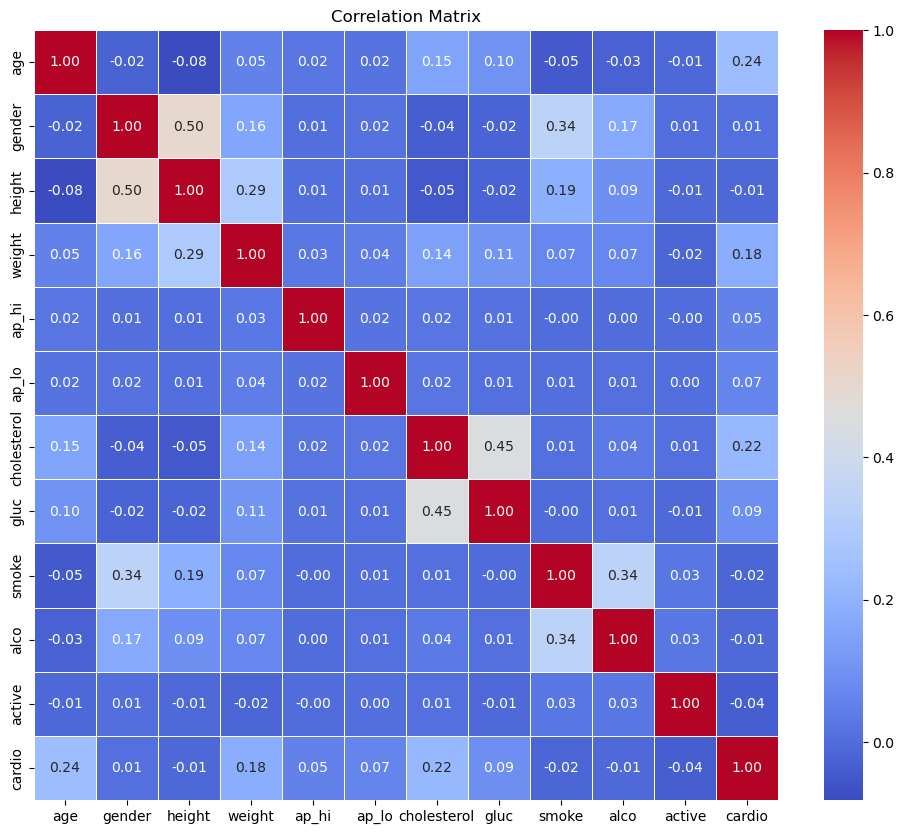

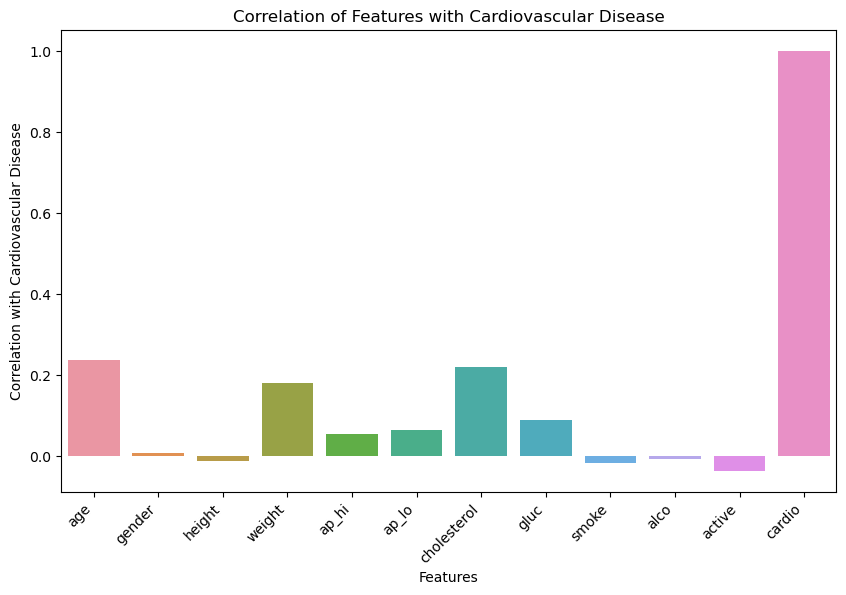

In [15]:
# Compute the correlation matrix for the DataFrame 'cardio_df'
correlation_matrix = cardio_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Set the figure size for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show()  # Display the heatmap

# Visualize the correlations of features with the target variable 'cardio'
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
bar_plot = sns.barplot(x=correlation_matrix['cardio'].index, y=correlation_matrix['cardio'])
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel('Features')  # Set the label for the x-axis
plt.ylabel('Correlation with Cardiovascular Disease')  # Set the label for the y-axis
plt.title('Correlation of Features with Cardiovascular Disease')  # Set the title of the plot
plt.show()  # Display the bar plot


In [16]:
# Create a dictionary to store unique values for each column in the DataFrame 'cardio_df'
distinct_values = {column: cardio_df[column].unique() for column in cardio_df.columns}

# Iterate through the dictionary to print information about distinct values in each column
for column, unique_values in distinct_values.items():
    # Print the column name and the count of distinct values
    print(f"Column '{column}' has {len(unique_values)} distinct values:")
    
    # Print the actual distinct values for the current column
    print(unique_values)
    
    # Add an empty line for better readability between different columns
    print()


Column 'age' has 8076 distinct values:
[18393 20228 18857 ... 14925 17727 17926]

Column 'gender' has 2 distinct values:
[2 1]

Column 'height' has 109 distinct values:
[168 156 165 169 151 157 178 158 164 173 181 172 170 154 162 163 153 159
 166 155 160 175 171 152 187 148 179 180 188 185 167 183 174 176 161 184
 177 182  76 149 142 150 144 147 186 146 141 195 140 198 145 143 196 138
 194 190 134 136 100 120 189 137 192 122 250 191 117  70  97 119 130 110
 193  75 132  71 135  67 125 139 133  74  98 112 207  68  55  81  80  64
  91  60 109  72 197  65 128 105 108 200 104 111 113  96 131  59  66  99
  57]

Column 'weight' has 287 distinct values:
[ 62.    85.    64.    82.    56.    67.    93.    95.    71.    68.
  80.    60.    78.   112.    75.    52.    83.    69.    90.    45.
  65.    59.    66.    74.   105.    73.    55.    70.    72.    63.
  50.   107.    84.    77.    79.    76.    58.   115.    97.    53.
  57.    49.   110.    94.    92.    87.   103.    88.    99.   100.


## Feature Engineering

In [17]:
# Calculate the Body Mass Index (BMI) using the weight and height columns
# Formula: BMI = weight / ((height / 100) ** 2)
cardio_df['bmi'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)

# Display the first 3 rows of the DataFrame to verify the new 'bmi' column
cardio_df.head(3)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


##### As shown in the distinct values earlier the Systolic blood pressure 'ap_hi' has negative values
We will address that below

In [18]:
# Filter rows where the 'ap_hi' column has negative values (not saved or displayed)
cardio_df[cardio_df["ap_hi"] < 0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
4607,15281,1,165,78.0,-100,80,2,1,0,0,1,0,28.650138
16021,22108,2,161,90.0,-115,70,1,1,0,0,1,0,34.720883
20536,15581,1,153,54.0,-100,70,1,1,0,0,1,0,23.068051
23988,18301,1,162,74.0,-140,90,1,1,0,0,1,1,28.196921
25240,14711,2,168,50.0,-120,80,2,1,0,0,0,1,17.715420
35040,23325,2,168,59.0,-150,80,1,1,0,0,1,1,20.904195
46627,23646,2,160,59.0,-120,80,1,1,0,0,0,0,23.046875


In [19]:
# Take the absolute values of entries in the 'ap_hi' column to ensure non-negativity
cardio_df["ap_hi"] = cardio_df["ap_hi"].abs()

In [20]:
# Filter rows where the 'ap_lo' column has negative values (not saved or displayed)
cardio_df[cardio_df["ap_lo"]<0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
60106,22571,1,167,74.0,15,-70,1,1,0,0,1,1,26.533759


In [21]:
# Take the absolute values of entries in the 'ap_lo' column to ensure non-negativity
cardio_df["ap_lo"] = cardio_df["ap_lo"].abs()


In [22]:
# Filter rows where the 'ap_hi' column has values less than 30 and display the first few rows
cardio_df[cardio_df["ap_hi"] < 30].head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
567,21281,1,168,78.0,14,90,2,1,0,0,1,1,27.636054
927,21867,2,175,70.0,14,90,3,1,0,0,1,1,22.857143
979,18225,1,172,65.0,11,80,1,3,0,0,1,0,21.971336
1600,19201,1,165,66.0,12,80,1,1,0,0,1,0,24.242424
1627,22591,1,165,71.0,14,80,1,1,0,0,1,1,26.078972


Blood pressure values are measured in mm Hg by medical professionals, so they are usually written as 120/80 instead of 12/8. Based on this, I noticed that some systolic blood pressure values in the dataset are below 25 when they should be below 250 mm Hg. Therefore, I decided to normalize these values.


In [23]:
# Update values in the 'ap_hi' column based on a condition using np.where
# If 'ap_hi' < 25, multiply the value by 10; otherwise, keep the original value
cardio_df['ap_hi'] = np.where(cardio_df['ap_hi'] < 25, cardio_df['ap_hi'] * 10, cardio_df['ap_hi'])

# Filter rows where the 'ap_hi' column has values less than 30 and display the first few rows
cardio_df[cardio_df["ap_hi"] < 30].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
8757,16905,2,163,63.0,10,2088,1,1,1,0,1,0,23.711845
42334,18716,1,171,80.0,10,1088,1,1,0,0,1,1,27.358845


In [24]:
# Filter rows where the 'ap_hi' column has values less than 25 and display the first few rows
cardio_df[cardio_df["ap_hi"] < 25].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
8757,16905,2,163,63.0,10,2088,1,1,1,0,1,0,23.711845
42334,18716,1,171,80.0,10,1088,1,1,0,0,1,1,27.358845


In [25]:
# Filter rows where the 'ap_lo' column has values less than 15 and display the first few rows
cardio_df[cardio_df["ap_lo"] < 15].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
2014,22712,2,167,59.0,906,0,1,1,0,0,1,0,21.155294
6737,16705,1,156,61.0,150,10,1,1,0,0,0,1,25.065746
7598,14661,2,70,72.0,120,8,1,1,0,0,1,0,146.938776
9777,21802,1,166,125.0,120,8,3,1,0,0,1,1,45.362172
10106,18334,1,152,50.0,150,10,3,1,0,0,1,1,21.641274


In [26]:
# Update values in the 'ap_lo' column based on a condition using np.where
# If 'ap_lo' < 15, multiply the value by 10; otherwise, keep the original value
cardio_df['ap_lo'] = np.where(cardio_df['ap_lo'] < 15, cardio_df['ap_lo'] * 10, cardio_df['ap_lo'])

# Filter rows where the 'ap_lo' column has values less than 15 and display the first few rows
cardio_df[cardio_df["ap_lo"] < 15].head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
2014,22712,2,167,59.0,906,0,1,1,0,0,1,0,21.155294
13489,14965,2,150,60.0,130,0,1,1,0,0,0,0,26.666667
16459,20457,1,156,50.0,138,0,3,1,0,0,1,1,20.545694
17381,18226,1,164,78.0,138,0,1,1,0,0,1,0,29.000595
22923,21182,2,166,68.0,149,0,1,1,0,0,1,1,24.677021


After fixing the values and checking again, we see that there are still a couple of observation units with a systolic and diastolic blood pressure value less than 15 and 25. I think it is better to remove these observation units.

In [27]:
# Remove rows where the 'ap_lo' value is less than 15 from the DataFrame
cardio_df.drop(cardio_df[cardio_df['ap_lo'] < 15].index, inplace=True)

# Remove rows where the 'ap_hi' value is less than 25 from the DataFrame
cardio_df.drop(cardio_df[cardio_df['ap_hi'] < 25].index, inplace=True)


I will apply a lower and upper limit for these two blood pressure values based on what I know about them. I will remove the observations that have values outside these limits. For systolic blood pressure, the limits are 80 and 250, and for diastolic blood pressure, the limits are 50 and 150. The changes according to this are as follows.

In [28]:
# Filter the DataFrame based on specific ranges for 'ap_lo' and 'ap_hi'
# Retain rows where 50 <= ap_lo <= 150 and 80 <= ap_hi <= 250
cardio_df = cardio_df[((50 <= cardio_df['ap_lo']) & (cardio_df['ap_lo'] <= 150)) & ((80 <= cardio_df['ap_hi']) & (cardio_df['ap_hi'] <= 250))]


In [29]:
# Identify rows where systolic blood pressure ('ap_hi') is less than diastolic blood pressure ('ap_lo')
inconsistent_bp_rows = cardio_df[cardio_df["ap_hi"] < cardio_df["ap_lo"]]

# Display the first few rows of the DataFrame containing inconsistent blood pressure values
print(inconsistent_bp_rows.head())


        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
474   19099       1     156    65.0    120    150            2     1      0   
2384  23361       1     154   102.0     90    150            1     1      0   
2990  21957       2     182    90.0     80    140            3     3      0   
3447  19992       2     180    80.0     80    125            3     3      1   
3623  21874       1     160    83.0     80    120            1     1      0   

      alco  active  cardio        bmi  
474      0       1       0  26.709402  
2384     0       0       1  43.008939  
2990     0       1       1  27.170632  
3447     1       1       1  24.691358  
3623     0       1       0  32.421875  


In [30]:
# Swap values of 'ap_hi' and 'ap_lo' where 'ap_hi' < 'ap_lo'
cardio_df["ap_hi"], cardio_df["ap_lo"] = np.where(
    cardio_df["ap_hi"] < cardio_df["ap_lo"], 
    (cardio_df["ap_lo"], cardio_df["ap_hi"]),  # If condition is true, swap values
    (cardio_df["ap_hi"], cardio_df["ap_lo"])   # If condition is false, keep values unchanged
)


C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3433496980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df["ap_hi"], cardio_df["ap_lo"] = np.where(


In [31]:
# Filter rows where systolic blood pressure ('ap_hi') is equal to diastolic blood pressure ('ap_lo')
matching_bp_rows = cardio_df[cardio_df["ap_hi"] == cardio_df["ap_lo"]]

# Display the first few rows of the DataFrame containing matching blood pressure values
print(matching_bp_rows.head())


         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
12785  15787       2     178   105.0    100    100            1     1      0   
32190  23183       1     162   120.0    100    100            1     1      0   

       alco  active  cardio        bmi  
12785     0       0       1  33.139755  
32190     0       1       0  45.724737  


In [32]:
# Remove rows where systolic blood pressure ('ap_hi') is equal to diastolic blood pressure ('ap_lo')
cardio_df.drop(cardio_df[cardio_df["ap_hi"] == cardio_df["ap_lo"]].index, inplace=True)


C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\2129516685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df.drop(cardio_df[cardio_df["ap_hi"] == cardio_df["ap_lo"]].index, inplace=True)


In [33]:
# Generate summary statistics for numerical columns and transpose the table
numerical_summary = cardio_df.describe().T

# Display the transposed summary statistics table
print(numerical_summary)


               count          mean          std           min           25%  \
age          68910.0  19464.015063  2468.143628  10798.000000  17657.000000   
gender       68910.0      1.348759     0.476581      1.000000      1.000000   
height       68910.0    164.361152     8.204122     55.000000    159.000000   
weight       68910.0     74.119354    14.327717     11.000000     65.000000   
ap_hi        68910.0    126.673952    16.673993     80.000000    120.000000   
ap_lo        68910.0     81.318836     9.400277     50.000000     80.000000   
cholesterol  68910.0      1.364388     0.678683      1.000000      1.000000   
gluc         68910.0      1.225686     0.571622      1.000000      1.000000   
smoke        68910.0      0.087897     0.283147      0.000000      0.000000   
alco         68910.0      0.053476     0.224981      0.000000      0.000000   
active       68910.0      0.803323     0.397489      0.000000      1.000000   
cardio       68910.0      0.494848     0.499977     

In [34]:
# Filter and display rows where "height" is less than 140
filtered_height_rows = cardio_df[cardio_df["height"] < 140].head()

# Drop the filtered rows based on "height" less than 140
cardio_df.drop(cardio_df[cardio_df['height'] < 140].index, inplace=True)

# Filter and display rows where "weight" is less than 35
filtered_weight_rows = cardio_df[cardio_df["weight"] < 35].head()

# Drop the filtered rows based on "weight" less than 35
cardio_df.drop(cardio_df[cardio_df['weight'] < 35].index, inplace=True)

# Drop rows where "weight" is greater than 150
cardio_df.drop(cardio_df[cardio_df['weight'] > 150].index, inplace=True)

# Drop rows where "height" is greater than 210
cardio_df.drop(cardio_df[cardio_df['height'] > 210].index, inplace=True)


C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3062985280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df.drop(cardio_df[cardio_df['height'] < 140].index, inplace=True)
C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3062985280.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df.drop(cardio_df[cardio_df['weight'] < 35].index, inplace=True)
C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3062985280.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [35]:
# Calculate BMI and add it as a new column in the DataFrame
cardio_df['bmi'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)

# Define BMI classification conditions
conditions = [
    (cardio_df["bmi"] <= 15),                             # 0 - Anorexic
    (cardio_df["bmi"] > 15) & (cardio_df["bmi"] <= 18.5),  # 1 - Underweight
    (cardio_df["bmi"] > 18.5) & (cardio_df["bmi"] <= 25),  # 2 - Normal weight
    (cardio_df["bmi"] > 25) & (cardio_df["bmi"] <= 30),    # 3 - Overweight
    (cardio_df["bmi"] > 30) & (cardio_df["bmi"] <= 35),    # 4 - Obesity Class I
    (cardio_df["bmi"] > 35) & (cardio_df["bmi"] <= 40),    # 5 - Obesity Class II
    (cardio_df["bmi"] > 40)                                # 6 - Obesity Class III 
]

# Define BMI class labels
bmi_class = [0, 1, 2, 3, 4, 5, 6]

# Assign BMI class labels to the DataFrame based on the conditions
cardio_df["bmi_class"] = np.select(conditions, bmi_class)


C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3672952580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df['bmi'] = cardio_df['weight'] / ((cardio_df['height'] / 100) ** 2)
C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\3672952580.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df["bmi_class"] = np.select(conditions, bmi_class)


In [36]:
# view the data 
cardio_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,3
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,6
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,4
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,3


In [37]:
# Compute pulse pressure (difference between systolic and diastolic blood pressure)
cardio_df["pulse_press"] = cardio_df["ap_hi"] - cardio_df["ap_lo"]


C:\Users\Bolanle\AppData\Local\Temp\ipykernel_23768\2793778794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cardio_df["pulse_press"] = cardio_df["ap_hi"] - cardio_df["ap_lo"]


In [38]:
# Filter the cardio_df DataFrame based on BMI values between 16 and 45
filtered_cardioDf = cardio_df[(cardio_df['bmi'] >= 16) & (cardio_df['bmi'] <= 45)]

# Display the first three rows of the filtered DataFrame
filtered_cardioDf.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_class,pulse_press
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,2,30
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,4,50
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,2,60


#### Addressing the Gender imbalance

In [39]:
# Initialize the RandomOverSampler with a specified random state for reproducibility.
ros = RandomOverSampler(random_state=42)

# Perform random oversampling on the dataset, excluding the 'gender' column for the feature set.
X_resampled, y_resampled = ros.fit_resample(cardio_df.drop("gender", axis=1), cardio_df["gender"])

# Display the class distribution after resampling using the Counter function from the collections module.
print("Class distribution after resampling:", Counter(y_resampled))


Class distribution after resampling: Counter({2: 44737, 1: 44737})


We have a uniform distribution of our target variable in our dataset, which is beneficial. This means that we have enough data for each possible outcome and that our model will not be biased towards one class. However, the gender variable seems to have an imbalance, as there are more females than males in the dataset. This could affect the accuracy and generalizability of the model, especially if gender is an important predictor for your target variable.

I have applied RandomOverSampler to resample

## MACHINE LEARNING


#### 80/20 split

Logistic Regression Metrics:
Accuracy: 0.7291651396320458
Confusion Matrix:
 [[5491 1433]
 [2262 4457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6924
           1       0.76      0.66      0.71      6719

    accuracy                           0.73     13643
   macro avg       0.73      0.73      0.73     13643
weighted avg       0.73      0.73      0.73     13643


Decision Tree Metrics:
Accuracy: 0.6330719050062303
Confusion Matrix:
 [[4418 2506]
 [2500 4219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      6924
           1       0.63      0.63      0.63      6719

    accuracy                           0.63     13643
   macro avg       0.63      0.63      0.63     13643
weighted avg       0.63      0.63      0.63     13643


Random Forest Metrics:
Accuracy: 0.708641794326761
Confusion Matrix:
 [[4999 1925]
 [2050 4669

C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Metrics:
Accuracy: 0.6962544894817855
Confusion Matrix:
 [[4947 1977]
 [2167 4552]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      6924
           1       0.70      0.68      0.69      6719

    accuracy                           0.70     13643
   macro avg       0.70      0.70      0.70     13643
weighted avg       0.70      0.70      0.70     13643


Logistic Regression AUC: 0.7922612517732336

Decision Tree AUC: 0.6329893954639786

Random Forest AUC: 0.7701805880166517

K-Nearest Neighbors AUC: 0.7453995558608426


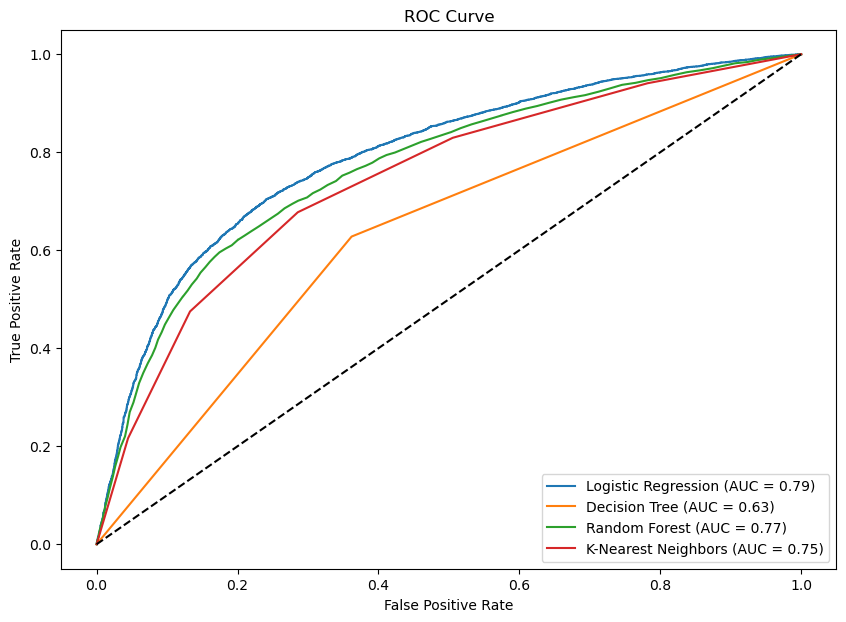

In [40]:
# Data preparation
X = filtered_cardioDf.drop(columns=[target_column])
y = filtered_cardioDf[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Print evaluation metrics for the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # Decision Trees don't require scaling
y_pred_dt = model_dt.predict(X_test)

# Print evaluation metrics for the Decision Tree model
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = model_rf.predict(X_test)

# Print evaluation metrics for the Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the K-Nearest Neighbors model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Print evaluation metrics for the K-Nearest Neighbors model
print("\nK-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute AUC & ROC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Print AUC for Logistic Regression
print("\nLogistic Regression AUC:", auc_lr)

# Compute AUC & ROC for Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Print AUC for Decision Tree
print("\nDecision Tree AUC:", auc_dt)

# Compute AUC & ROC for Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Print AUC for Random Forest
print("\nRandom Forest AUC:", auc_rf)

# Compute AUC & ROC for K-Nearest Neighbors
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# Print AUC for K-Nearest Neighbors
print("\nK-Nearest Neighbors AUC:", auc_knn)

# Plot ROC curves for the models
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### 70/30 split

Logistic Regression Metrics:
Accuracy: 0.7302711947226973
Confusion Matrix:
 [[8174 2206]
 [3314 6771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     10380
           1       0.75      0.67      0.71     10085

    accuracy                           0.73     20465
   macro avg       0.73      0.73      0.73     20465
weighted avg       0.73      0.73      0.73     20465


Decision Tree Metrics:
Accuracy: 0.6297581236257024
Confusion Matrix:
 [[6609 3771]
 [3806 6279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64     10380
           1       0.62      0.62      0.62     10085

    accuracy                           0.63     20465
   macro avg       0.63      0.63      0.63     20465
weighted avg       0.63      0.63      0.63     20465


Random Forest Metrics:
Accuracy: 0.7102858538968971
Confusion Matrix:
 [[7500 2880]
 [3049 703

C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Metrics:
Accuracy: 0.6927925726850721
Confusion Matrix:
 [[7357 3023]
 [3264 6821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70     10380
           1       0.69      0.68      0.68     10085

    accuracy                           0.69     20465
   macro avg       0.69      0.69      0.69     20465
weighted avg       0.69      0.69      0.69     20465


Logistic Regression AUC: 0.7929172075890576

Decision Tree AUC: 0.6297148610605614

Random Forest AUC: 0.7686898119357332

K-Nearest Neighbors AUC: 0.7413464167294758


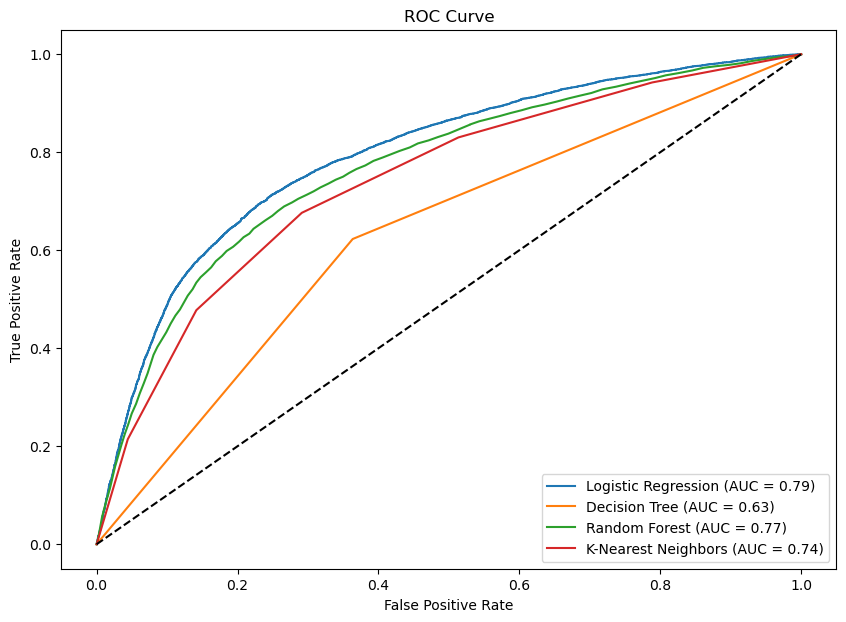

In [41]:
# Make sure to replace 'cardio' with the actual name of your target column
X = filtered_cardioDf.drop(columns=[target_column])
y = filtered_cardioDf[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Print evaluation metrics for the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # Decision Trees don't require scaling
y_pred_dt = model_dt.predict(X_test)

# Print evaluation metrics for the Decision Tree model
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = model_rf.predict(X_test)

# Print evaluation metrics for the Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the K-Nearest Neighbors model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Print evaluation metrics for the K-Nearest Neighbors model
print("\nK-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute AUC & ROC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Print AUC for Logistic Regression
print("\nLogistic Regression AUC:", auc_lr)

# Compute AUC & ROC for Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Print AUC for Decision Tree
print("\nDecision Tree AUC:", auc_dt)

# Compute AUC & ROC for Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Print AUC for Random Forest
print("\nRandom Forest AUC:", auc_rf)

# Compute AUC & ROC for K-Nearest Neighbors
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# Print AUC for K-Nearest Neighbors
print("\nK-Nearest Neighbors AUC:", auc_knn)

# Plot ROC curves for the models
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Feature importance

In [42]:
# Extract feature importances from the Decision Tree model
importances_dt = model_dt.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_dt = pd.DataFrame({'Feature': feature_names, 'Importance': importances_dt})

# Print the sorted feature importances in descending order
print("Decision Tree Feature Importances:")
print(feature_importance_dt.sort_values(by='Importance', ascending=False))


Decision Tree Feature Importances:
        Feature  Importance
0           age    0.287187
4         ap_hi    0.221816
11          bmi    0.159645
2        height    0.092395
3        weight    0.090901
6   cholesterol    0.031392
13  pulse_press    0.026011
5         ap_lo    0.022665
1        gender    0.017706
7          gluc    0.014652
10       active    0.014408
8         smoke    0.009054
12    bmi_class    0.006565
9          alco    0.005602


In [43]:
# Extract feature importances from the Random Forest model
importances_rf = model_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})

# Print the sorted feature importances in descending order
print("\nRandom Forest Feature Importances:")
print(feature_importance_rf.sort_values(by='Importance', ascending=False))



Random Forest Feature Importances:
        Feature  Importance
0           age    0.255485
11          bmi    0.150117
4         ap_hi    0.115383
3        weight    0.109679
2        height    0.107235
5         ap_lo    0.074903
13  pulse_press    0.065317
6   cholesterol    0.037428
1        gender    0.017581
12    bmi_class    0.017504
7          gluc    0.017391
10       active    0.015253
8         smoke    0.009488
9          alco    0.007237


##  hyperparameter tuning

In [44]:
# Import necessary library
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularization penalties for Logistic Regression
    'solver': ['liblinear', 'saga']  # Different solvers available for Logistic Regression
}

# Create the Logistic Regression model
model = LogisticRegression()

# Create GridSearchCV object with 5-fold cross-validation and accuracy scoring
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)


C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: T

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


80/20 split

Logistic Regression Metrics:
Accuracy: 0.7291651396320458
Confusion Matrix:
 [[5491 1433]
 [2262 4457]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6924
           1       0.76      0.66      0.71      6719

    accuracy                           0.73     13643
   macro avg       0.73      0.73      0.73     13643
weighted avg       0.73      0.73      0.73     13643


Decision Tree Metrics:
Accuracy: 0.6330719050062303
Confusion Matrix:
 [[4418 2506]
 [2500 4219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      6924
           1       0.63      0.63      0.63      6719

    accuracy                           0.63     13643
   macro avg       0.63      0.63      0.63     13643
weighted avg       0.63      0.63      0.63     13643


Random Forest Metrics:
Accuracy: 0.708641794326761
Confusion Matrix:
 [[4999 1925]
 [2050 4669

C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Metrics:
Accuracy: 0.6962544894817855
Confusion Matrix:
 [[4947 1977]
 [2167 4552]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      6924
           1       0.70      0.68      0.69      6719

    accuracy                           0.70     13643
   macro avg       0.70      0.70      0.70     13643
weighted avg       0.70      0.70      0.70     13643


Logistic Regression AUC: 0.7922612517732336

Decision Tree AUC: 0.6329893954639786

Random Forest AUC: 0.7701805880166517

K-Nearest Neighbors AUC: 0.7453995558608426


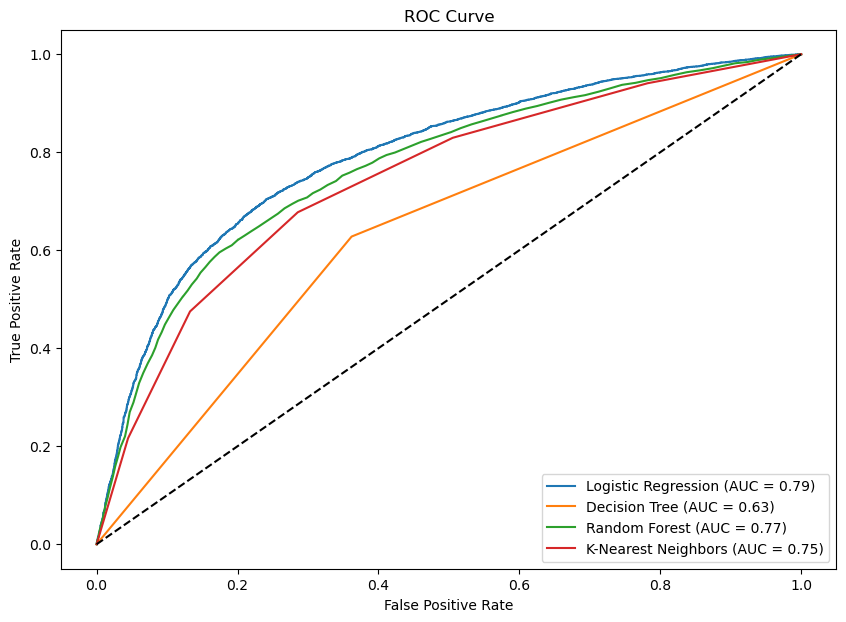

In [45]:
X = filtered_cardioDf.drop(columns=[target_column])
y = filtered_cardioDf[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Print evaluation metrics for the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # Decision Trees don't require scaling
y_pred_dt = model_dt.predict(X_test)

# Print evaluation metrics for the Decision Tree model
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = model_rf.predict(X_test)

# Print evaluation metrics for the Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the K-Nearest Neighbors model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Print evaluation metrics for the K-Nearest Neighbors model
print("\nK-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute AUC & ROC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Print AUC for Logistic Regression
print("\nLogistic Regression AUC:", auc_lr)

# Compute AUC & ROC for Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Print AUC for Decision Tree
print("\nDecision Tree AUC:", auc_dt)

# Compute AUC & ROC for Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Print AUC for Random Forest
print("\nRandom Forest AUC:", auc_rf)

# Compute AUC & ROC for K-Nearest Neighbors
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# Print AUC for K-Nearest Neighbors
print("\nK-Nearest Neighbors AUC:", auc_knn)

# Plot ROC curves for the models
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [46]:
70/30

2.3333333333333335

Logistic Regression Metrics:
Accuracy: 0.7302711947226973
Confusion Matrix:
 [[8174 2206]
 [3314 6771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75     10380
           1       0.75      0.67      0.71     10085

    accuracy                           0.73     20465
   macro avg       0.73      0.73      0.73     20465
weighted avg       0.73      0.73      0.73     20465


Decision Tree Metrics:
Accuracy: 0.6297581236257024
Confusion Matrix:
 [[6609 3771]
 [3806 6279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64     10380
           1       0.62      0.62      0.62     10085

    accuracy                           0.63     20465
   macro avg       0.63      0.63      0.63     20465
weighted avg       0.63      0.63      0.63     20465


Random Forest Metrics:
Accuracy: 0.7102858538968971
Confusion Matrix:
 [[7500 2880]
 [3049 703

C:\Users\Bolanle\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



K-Nearest Neighbors Metrics:
Accuracy: 0.6927925726850721
Confusion Matrix:
 [[7357 3023]
 [3264 6821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70     10380
           1       0.69      0.68      0.68     10085

    accuracy                           0.69     20465
   macro avg       0.69      0.69      0.69     20465
weighted avg       0.69      0.69      0.69     20465


Logistic Regression AUC: 0.7929172075890576

Decision Tree AUC: 0.6297148610605614

Random Forest AUC: 0.7686898119357332

K-Nearest Neighbors AUC: 0.7413464167294758


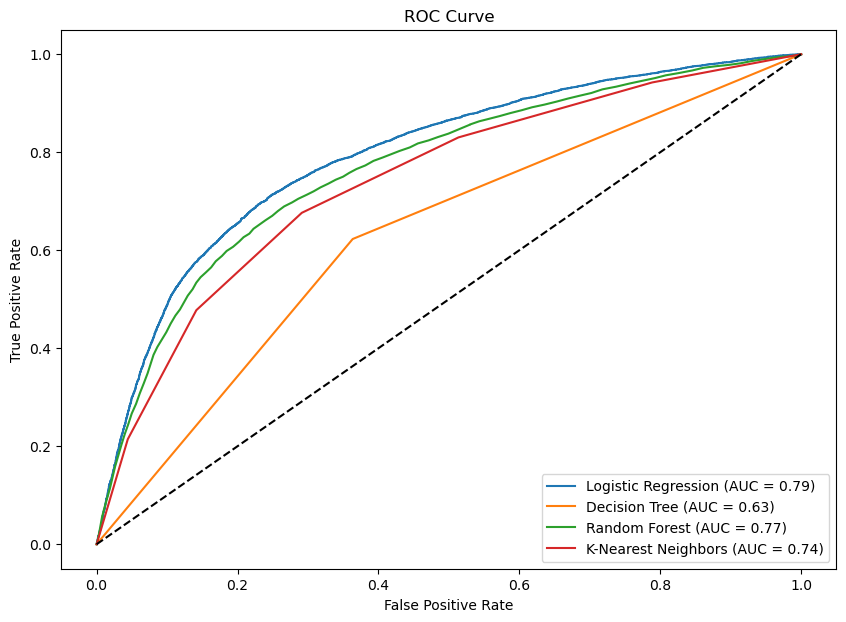

In [47]:
# Make sure to replace 'cardio' with the actual name of your target column
X = filtered_cardioDf.drop(columns=[target_column])
y = filtered_cardioDf[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but often recommended for certain models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# Print evaluation metrics for the Logistic Regression model
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Train and evaluate the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)  # Decision Trees don't require scaling
y_pred_dt = model_dt.predict(X_test)

# Print evaluation metrics for the Decision Tree model
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Train and evaluate the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)  # Random Forest doesn't require scaling
y_pred_rf = model_rf.predict(X_test)

# Print evaluation metrics for the Random Forest model
print("\nRandom Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Train and evaluate the K-Nearest Neighbors model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)

# Print evaluation metrics for the K-Nearest Neighbors model
print("\nK-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Compute AUC & ROC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test_scaled)[:, 1]
auc_lr = roc_auc_score(y_test, y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Print AUC for Logistic Regression
print("\nLogistic Regression AUC:", auc_lr)

# Compute AUC & ROC for Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

# Print AUC for Decision Tree
print("\nDecision Tree AUC:", auc_dt)

# Compute AUC & ROC for Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Print AUC for Random Forest
print("\nRandom Forest AUC:", auc_rf)

# Compute AUC & ROC for K-Nearest Neighbors
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
auc_knn = roc_auc_score(y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

# Print AUC for K-Nearest Neighbors
print("\nK-Nearest Neighbors AUC:", auc_knn)

# Plot ROC curves for the models
plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"K-Nearest Neighbors (AUC = {auc_knn:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [48]:
from sklearn.metrics import log_loss

y_prob_lr = model_lr.predict_proba(X_test_scaled)
logloss_lr = log_loss(y_test, y_prob_lr)
print("\nLogistic Regression Log Loss:", logloss_lr)

y_prob_rf = model_rf.predict_proba(X_test)
logloss_rf = log_loss(y_test, y_prob_rf)
print("\nRandom Forest Log Loss:", logloss_rf)

y_prob_knn = model_knn.predict_proba(X_test_scaled)
logloss_knn = log_loss(y_test, y_prob_knn)
print("\nK-Nearest Neighbors Log Loss:", logloss_knn)




Logistic Regression Log Loss: 0.5589080375151689

Random Forest Log Loss: 0.6172248407624209

K-Nearest Neighbors Log Loss: 2.2303608156291173
